In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [3]:
altcrystal1_a4_Apm = np.genfromtxt((conv(x) for x in open("A4 Festkörper/altcrystal1_a4_Apm.csv")), delimiter =";")
salt_pvdf_trfe_a4_apm = np.genfromtxt((conv(x) for x in open("A4 Festkörper/salt+pvdf-trfe_a4_apm.CSV")), delimiter =";")
methan_A05_2ndtry = np.genfromtxt((conv(x) for x in open("A4 Festkörper/methan_A0.5_2ndtry.CSV")), delimiter =";")
methan1_std_A4 = np.genfromtxt((conv(x) for x in open("A4 Festkörper/methan1_std_A4.CSV")), delimiter =";")

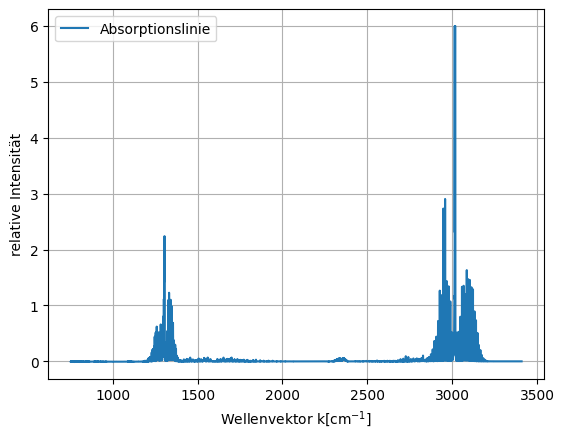

In [4]:
#plt.figure(figsize = [15,10])
#plt.plot(methan1_std_A4 [:,0],(methan1_std_A4 [:,1]) ,label= r"Absorptionslinie")
plt.plot(methan_A05_2ndtry [:,0],(methan_A05_2ndtry[:,1]) ,label= r"Absorptionslinie")
#plt.axis([2800,3200,0,7])
plt.xlabel(r"Wellenvektor k$ [\mathrm{cm}^{-1}]$")
plt.ylabel("relative Intensität")
plt.legend(loc = 0)
plt.grid(True)
plt.savefig("plots/methanfull.pdf")

In [7]:
peaks = sig.find_peaks(methan_A05_2ndtry[:,1],height=1,distance=75, threshold=0.005)
peakpos = peaks[0]
peakheight = peaks[1]['peak_heights']
#print(peaklist)
d=[]
d.append(methan_A05_2ndtry[36592 ,0] - methan_A05_2ndtry[36422 ,0])
d.append(methan_A05_2ndtry[36763  ,0] - methan_A05_2ndtry[36592 ,0])
d.append(methan_A05_2ndtry[36933  ,0] - methan_A05_2ndtry[36763  ,0])
d.append(methan_A05_2ndtry[37100  ,0] - methan_A05_2ndtry[36933  ,0])
d.append(methan_A05_2ndtry[38400,0] - methan_A05_2ndtry[38242,0])
d.append(methan_A05_2ndtry[38556,0] - methan_A05_2ndtry[38400,0])
d.append(methan_A05_2ndtry[38710,0] - methan_A05_2ndtry[38556,0])
d.append(methan_A05_2ndtry[38864,0] - methan_A05_2ndtry[38710,0])
d.append(methan_A05_2ndtry[39017,0] - methan_A05_2ndtry[38864,0])
d.append(methan_A05_2ndtry[39167,0] - methan_A05_2ndtry[39017,0])
d.append(methan_A05_2ndtry[39317,0] - methan_A05_2ndtry[39167,0])
B = sum(d)/len(d)
print("B=:"+str(B/2))

planck = 6.62607015*10**(-34)
sol = 299792458

thet = planck/(8*np.pi**2*(B/2)*sol)
print("Trägheitsmoment="+str(thet))


B=:4.802181818181804
Trägheitsmoment=5.829173676221545e-45


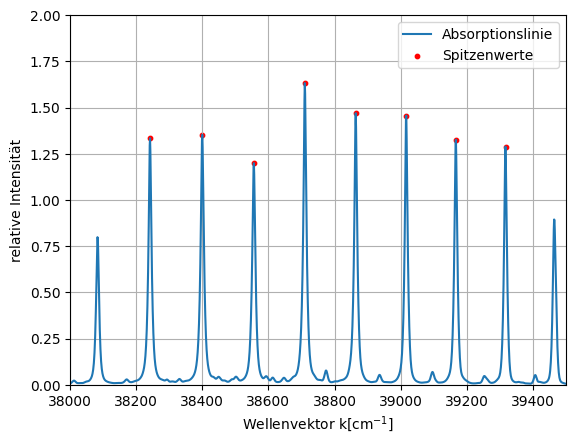

In [8]:
xax = np.arange(0,len(methan_A05_2ndtry))
plt.plot(xax, methan_A05_2ndtry[:,1],label="Absorptionslinie")
plt.scatter(peakpos,peakheight,label="Spitzenwerte", color ="red",s=10)
plt.axis([38000,39500,0,2])
plt.xlabel(r"Wellenvektor k$ [\mathrm{cm}^{-1}]$")
plt.ylabel("relative Intensität")
plt.legend(loc = 0)
plt.grid(True)
plt.savefig("plots/methanpeaks.pdf")